# Microwave Data
This colab is working with Thomas and Chris' microwave data, which seems to have a decent amount of missing info. Not sure why, it's supposed to go thru clouds.

##Metadata Information##

**Time**:

Filename should give year and day of year, the array should have 96 15-minute time-slices starting at 0:00 of that day. I think Chris gave it in UTC order, otherwise its local day. (easy to see if any of those slices has same-time of day temperatures or east west variation).

**Geolocation**:

Practice is regular 0.25-degree grid for this, probably with North West corner at (60 N, 180 W). (*Jon and I decided to just assume this is correct for now*)

**Units**:

Some version of degree Kelvin, not sure if scaling was necessary, and what missing data value is. (This product won't have temperatures below zero).

**Microwave channel**:

Ka-band (37 GHz, vertical polarized). If we did the scaling correctly than this should indeed not matter.





In [68]:
# setup for earth engine
import ee
import geemap.core as geemap
ee.Authenticate()
ee.Initialize(project='ee-akerr1')

# h5py stuff
import h5py

# google drive stuff
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Helper fcns for iterating thru data and plotting**

In [88]:
# tracking month and num of days/mo
num_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# updates the string so we can iterate again
def update_filenames(filename_middle):
  str_date = iterate_day(filename_middle)
  return filename_base + str_date + filename_end

# returns tuple of month and day
def get_date_from_filename(filename_middle):
  day = int(filename_middle) % 100
  month = int(filename_middle[0:2])
  return month, day

# updates the day each iteration of the loop
def iterate_day(filename_middle):
  # get month and day from curr filename str
  month, day = get_date_from_filename(filename_middle)
  day = day + 1

  # if we went into the next month, update month index and reset day
  if (day > num_days[month-1]):
    month = month + 1
    day = 1

  # convert date to appropriate string format
  str_date = ""

  # add leading 0 if necessary, append month
  if (month < 10):
    str_date += "0"
  str_date += str(month)

  # add leading 0 if necessary, append day
  if (day < 10):
    str_date += "0"
  str_date += str(day)

  # return new filename_middle
  return str_date

In [96]:
# plotting
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

def plot_data(dataset, filename_middle):
  month,day = get_date_from_filename(filename_middle)
  f, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(dataset[0])
  ax1.set_title(f"Start of day on: {month}/{day}")
  ax1.set_xlabel("Longitude")
  ax1.set_ylabel("Latitude")
  ax2.imshow(dataset[95])
  ax2.set_title(f"End of day on: {month}/{day}")
  ax2.set_xlabel("Longitude")
  ax2.set_ylabel("Latitude")
  return f

date: 0101
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230101_x1y.h5
date: 0102
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230102_x1y.h5
date: 0103
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230103_x1y.h5
date: 0104
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230104_x1y.h5
date: 0105
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230105_x1y.h5
date: 0106
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230106_x1y.h5
date: 0107
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230107_x1y.h5
date: 0108
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230108_x1y.h5
date: 0109
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230109_x1y.h5
date: 0110
filename: /content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_20230110_x1y.h5


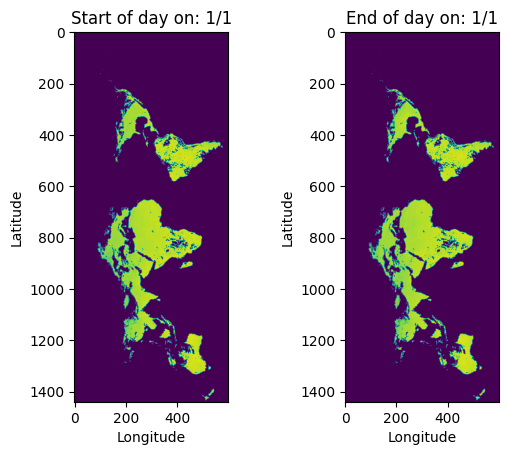

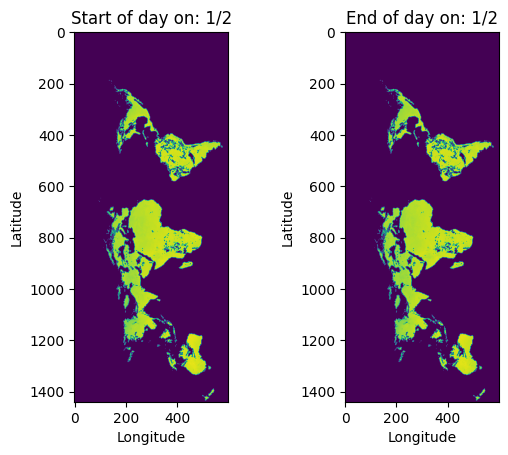

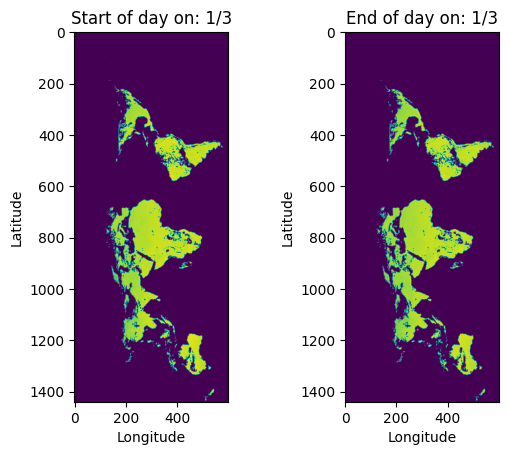

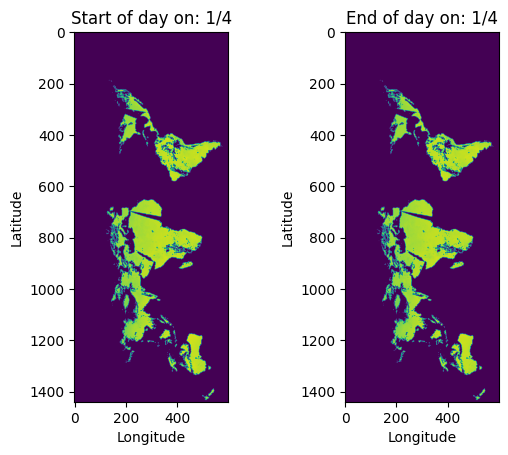

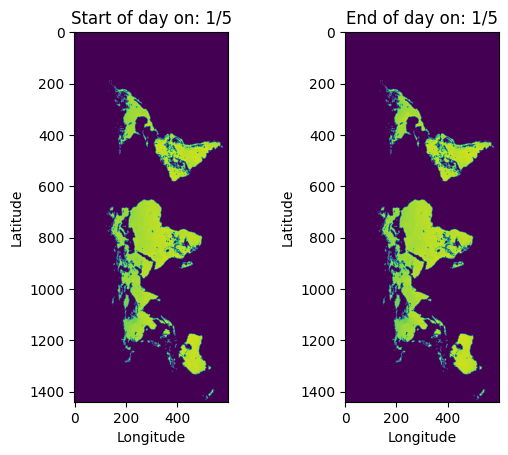

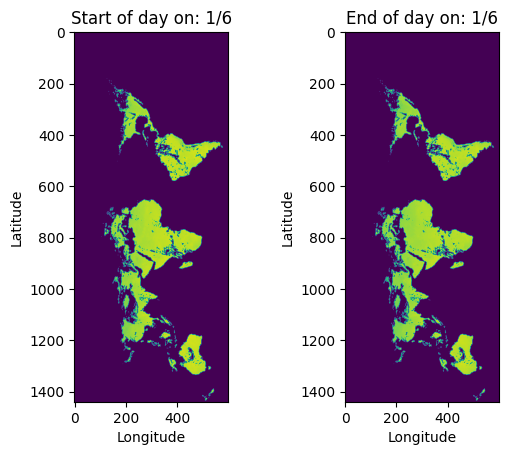

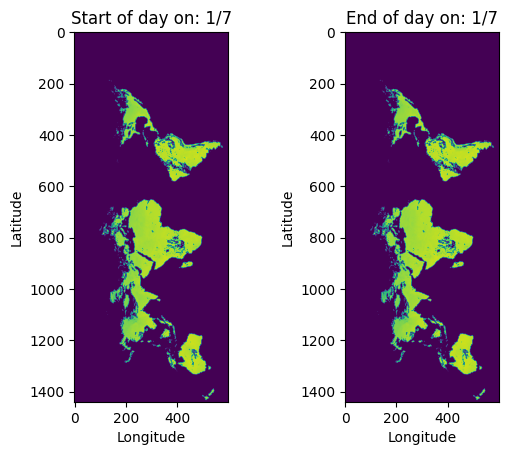

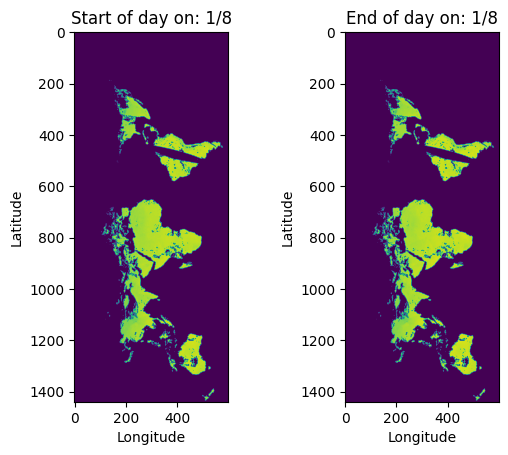

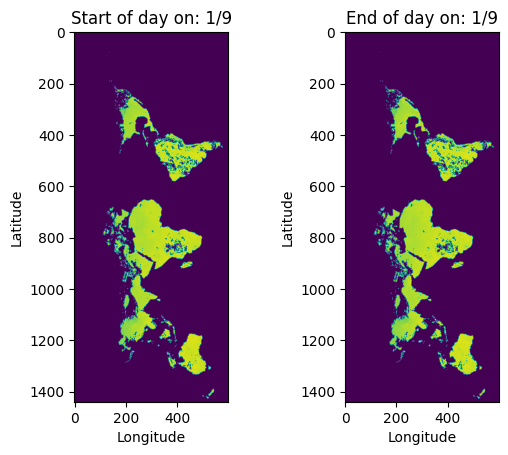

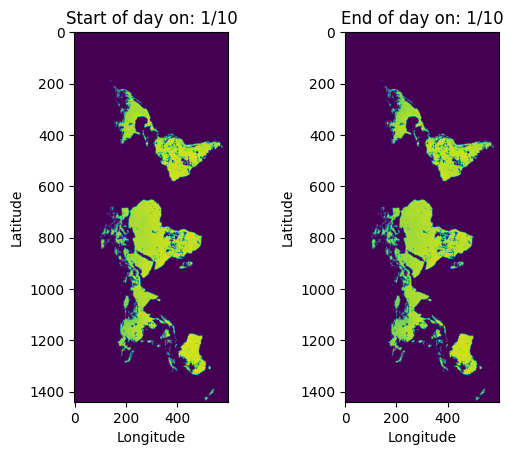

In [97]:
filename_base = r"/content/drive/MyDrive/Urban_Heat/mw_lst_2023/MW_LST_DTC_2023"
filename_middle = "0101"
filename_end = "_x1y.h5"
filename_full = filename_base + filename_middle + filename_end

# save our plots to a pdf in my drive
pp = PdfPages('/content/drive/MyDrive/Urban_Heat/Start_End_Day_Microwave.pdf')

for i in range(10):
  f = h5py.File(filename_full, 'r')
  dataset = f['TB37V_LST_DTC'] # 96 time slices, 1440 lon values, 600 lat values
  plot = plot_data(dataset, filename_middle) # plots start and end of day time slices
  pp.savefig(plot)
  filename_middle = iterate_day(filename_middle)
  filename_full = update_filenames(filename_middle)

pp.close()



# Plotting data